<a href="https://colab.research.google.com/github/sanchesprogramer/Inteligencia-Artificial/blob/main/Projeto/Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raphael Dias Sanches RA: 10403418

Felipe de Almeida Parreira RA: 10400771

In [102]:
#!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# Modelos de regressão
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [70]:
dataset = pd.read_csv("https://raw.githubusercontent.com/sanchesprogramer/Inteligencia-Artificial/refs/heads/main/Projeto/Bases/Rio_Pardo_RS.csv", sep = ";") #Precipitação na Cidade Rio Pardo
dataset_rio_jacui = pd.read_csv("https://raw.githubusercontent.com/sanchesprogramer/Inteligencia-Artificial/refs/heads/main/Projeto/Bases/Rio_Jacui_Nivel_Agua.csv", sep = ";") #Nivel do Rio jacui
dataset_inicio_inundacao = pd.read_csv("https://raw.githubusercontent.com/sanchesprogramer/Inteligencia-Artificial/refs/heads/main/Projeto/Bases/Inundacoes.csv", sep = ";") #Inicio das inundações em Rio Pardo
dataset_lagoa_dos_patos = pd.read_csv("https://raw.githubusercontent.com/sanchesprogramer/Inteligencia-Artificial/refs/heads/main/Projeto/Bases/Lagoa_Dos_Patos_Nivel_agua.csv", sep = ";") #Nivel da Represa Lagoa dos Patos

In [71]:
dataset

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2019,0,"999,03","999,28","998,80","27134,70","28,41","21,92","28,79","27,85","22,40","21,42","72,88","67,92","70,04","89,00","6,03","2,76"
1,02/01/2019,0,"996,51","999,28","996,26","25520,00","30,00","21,99","30,70","29,31","22,63","21,48","68,04","61,58","64,88","187,42","6,20","2,95"
2,03/01/2019,"15,6","994,78","999,28","994,30","9096,20","26,31","21,94","27,16","25,96","22,60","21,52","80,38","74,00","78,13","235,50","5,57","2,44"
3,04/01/2019,"0,4","1000,77","999,28","1000,43","16174,30","21,64","18,33","22,04","21,10","18,90","17,89","85,21","80,04","82,08","101,38","5,14","2,35"
4,05/01/2019,0,"1001,38","999,28","1001,18","19341,30","22,50","18,19","22,87","22,07","18,56","17,88","79,42","75,71","77,50","102,25","6,16","2,92"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,27/12/2024,0,"998,34","999,28","998,12","29909,40","22,64","13,61","23,43","21,83","14,29","12,92","63,13","56,67","59,92","288,29","6,19","3,29"
2188,28/12/2024,0,"1001,45","999,28","1001,16","25915,50","23,75","15,61","24,64","22,79","16,22","14,60","66,46","58,75","63,21","178,58","4,08","1,87"
2189,29/12/2024,0,"1002,64","999,28","1002,43","24126,70","23,01","16,86","23,73","22,32","17,53","16,48","72,79","67,38","69,88","100,25","6,50","3,64"
2190,30/12/2024,0,"1000,33","999,28","1000,13","25242,10","22,78","16,99","23,65","22,14","17,53","16,54","74,08","68,63","71,71","108,13","8,05","4,73"


In [72]:
dataset_rio_jacui['Water Level'] = dataset_rio_jacui['Water Level'].astype(str).replace(",", ".", regex=True).astype(float)
dataset_rio_jacui['Water Level Error'] = dataset_rio_jacui['Water Level Error'].astype(str).replace(",", ".", regex=True).astype(float)
dataset_rio_jacui

,Data,Water Level,Water Level Error
0,01/01/2019,0.743506,0.005479
1,02/01/2019,0.743506,0.005479
2,03/01/2019,0.743506,0.005479
3,04/01/2019,0.741146,0.005519
4,05/01/2019,0.738785,0.005559
...,...,...,...
2187,27/12/2024,0.000000,0.000000
2188,28/12/2024,0.000000,0.000000
2189,29/12/2024,13.081084,0.003443
2190,30/12/2024,0.000000,0.000000


In [73]:
dataset_inicio_inundacao

,Protocolo_S2iD,Nome_Municipio,Sigla_UF,regiao,Data_Registro,Data_Evento,Cod_Cobrade,tipologia,descricao_tipologia,grupo_de_desastre,...,PEPL_Ensino (R$),PEPL_total_publico,PEPR_Descricao,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR
0,RS-F-4315701-12100-20230915,Rio Pardo,RS,Sul,18/09/2023,15/09/2023,12100,7,Inundações,Hidrológico,...,0,"1285,02",O município foi afetado por volumes pluviométr...,"4177115,36","1122054,59",0,0,0,"5299169,94","5300454,96"
1,RS-F-4315701-12100-20240430,Rio Pardo,RS,Sul,02/05/2024,30/04/2024,12100,7,Inundações,Hidrológico,...,0,0,NaN,0,0,0,0,0,0,0


In [74]:
dataset_lagoa_dos_patos['Water Level'] = dataset_lagoa_dos_patos['Water Level'].astype(str).replace(",", ".", regex=True).astype(float)
dataset_lagoa_dos_patos['Water Level Error'] = dataset_lagoa_dos_patos['Water Level Error'].astype(str).replace(",", ".", regex=True).astype(float)
dataset_lagoa_dos_patos

,Data,Water Level,Water Level Error
0,01/01/2019,0.580229,0.004765
1,02/01/2019,0.590786,0.004665
2,03/01/2019,0.601343,0.004565
3,04/01/2019,0.611900,0.004464
4,05/01/2019,0.622457,0.004364
...,...,...,...
2187,27/12/2024,0.000000,0.000000
2188,28/12/2024,0.000000,0.000000
2189,29/12/2024,0.000000,0.000000
2190,30/12/2024,0.000000,0.000000


In [75]:
dataset_rio_jacui['Data'] = pd.to_datetime(dataset_rio_jacui['Data'], format='%d/%m/%Y')

dataset_rio_jacui = dataset_rio_jacui.set_index('Data')

dataset_rio_jacui['Water Level'] = dataset_rio_jacui['Water Level'].replace(0, np.nan)
dataset_rio_jacui['Water Level Error'] = dataset_rio_jacui['Water Level Error'].replace(0, np.nan)

dataset_rio_jacui['Water Level'] = dataset_rio_jacui['Water Level'].interpolate(method='linear')
dataset_rio_jacui['Water Level Error'] = dataset_rio_jacui['Water Level Error'].interpolate(method='linear')

dataset_rio_jacui.fillna(method='ffill', inplace=True)
dataset_rio_jacui.fillna(method='bfill', inplace=True)

dataset_rio_jacui = dataset_rio_jacui.drop(columns=['Water Level Error'])

display(dataset_rio_jacui)

/tmp/ipython-input-2374180518.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_rio_jacui.fillna(method='ffill', inplace=True)
/tmp/ipython-input-2374180518.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_rio_jacui.fillna(method='bfill', inplace=True)


,Water Level
Data,
2019-01-01,0.743506
2019-01-02,0.743506
2019-01-03,0.743506
2019-01-04,0.741146
2019-01-05,0.738785
...,...
2024-12-27,12.915012
2024-12-28,12.998048
2024-12-29,13.081084


In [76]:
dataset_lagoa_dos_patos['Data'] = pd.to_datetime(dataset_lagoa_dos_patos['Data'], format='%d/%m/%Y')

dataset_lagoa_dos_patos = dataset_lagoa_dos_patos.set_index('Data')

dataset_lagoa_dos_patos['Water Level'] = dataset_lagoa_dos_patos['Water Level'].replace(0, np.nan)
dataset_lagoa_dos_patos['Water Level Error'] = dataset_lagoa_dos_patos['Water Level Error'].replace(0, np.nan)

dataset_lagoa_dos_patos['Water Level'] = dataset_lagoa_dos_patos['Water Level'].interpolate(method='linear')
dataset_lagoa_dos_patos['Water Level Error'] = dataset_lagoa_dos_patos['Water Level Error'].interpolate(method='linear')

dataset_lagoa_dos_patos.fillna(method='ffill', inplace=True)
dataset_lagoa_dos_patos.fillna(method='bfill', inplace=True)

dataset_lagoa_dos_patos = dataset_lagoa_dos_patos.drop(columns=['Water Level Error'])

display(dataset_lagoa_dos_patos)

/tmp/ipython-input-664739633.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_lagoa_dos_patos.fillna(method='ffill', inplace=True)
/tmp/ipython-input-664739633.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_lagoa_dos_patos.fillna(method='bfill', inplace=True)


,Water Level
Data,
2019-01-01,0.580229
2019-01-02,0.590786
2019-01-03,0.601343
2019-01-04,0.611900
2019-01-05,0.622457
...,...
2024-12-27,0.466968
2024-12-28,0.466968
2024-12-29,0.466968


In [77]:
dataset_rio_jacui.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2019-01-01 to 2024-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Water Level  2192 non-null   float64
dtypes: float64(1)
memory usage: 34.2 KB


In [78]:
dataset_inicio_inundacao = dataset_inicio_inundacao[['Nome_Municipio', 'Data_Registro', 'Data_Evento', 'tipologia', 'descricao_tipologia', 'grupo_de_desastre', 'Status']]
dataset_inicio_inundacao['Data_Registro'] = pd.to_datetime(dataset_inicio_inundacao['Data_Registro'], format='%d/%m/%Y')
dataset_inicio_inundacao['Data_Evento'] = pd.to_datetime(dataset_inicio_inundacao['Data_Evento'], format='%d/%m/%Y')
dataset_inicio_inundacao = dataset_inicio_inundacao[dataset_inicio_inundacao['Nome_Municipio'] == 'Rio Pardo']
dataset_inicio_inundacao.head()

/tmp/ipython-input-3340574084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_inicio_inundacao['Data_Registro'] = pd.to_datetime(dataset_inicio_inundacao['Data_Registro'], format='%d/%m/%Y')
/tmp/ipython-input-3340574084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_inicio_inundacao['Data_Evento'] = pd.to_datetime(dataset_inicio_inundacao['Data_Evento'], format='%d/%m/%Y')


,Nome_Municipio,Data_Registro,Data_Evento,tipologia,descricao_tipologia,grupo_de_desastre,Status
0,Rio Pardo,2023-09-18,2023-09-15,7,Inundações,Hidrológico,Reconhecido
1,Rio Pardo,2024-05-02,2024-04-30,7,Inundações,Hidrológico,Reconhecido


In [79]:
dataset_inicio_inundacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Nome_Municipio       2 non-null      object        
 1   Data_Registro        2 non-null      datetime64[ns]
 2   Data_Evento          2 non-null      datetime64[ns]
 3   tipologia            2 non-null      int64         
 4   descricao_tipologia  2 non-null      object        
 5   grupo_de_desastre    2 non-null      object        
 6   Status               2 non-null      object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 244.0+ bytes


In [80]:
dataset = dataset.drop(columns=['RADIACAO GLOBAL (KJ/m²)']) #Não será levado em consideração a radiação global nesse projeto
colunas_numericas = dataset.columns.difference(["Data", "Hora UTC"])
dataset[colunas_numericas] = dataset[colunas_numericas].astype(str).replace(",", ".", regex=True).astype(float)
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        try:
            dataset[col] = pd.to_datetime(dataset[col])
        except:
            pass

In [81]:
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
dataset.head()

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2019,0.0,999.03,999.28,998.80,28.41,21.92,28.79,27.85,22.40,21.42,72.88,67.92,70.04,89.00,6.03,2.76
1,02/01/2019,0.0,996.51,999.28,996.26,30.00,21.99,30.70,29.31,22.63,21.48,68.04,61.58,64.88,187.42,6.20,2.95
2,03/01/2019,15.6,994.78,999.28,994.30,26.31,21.94,27.16,25.96,22.60,21.52,80.38,74.00,78.13,235.50,5.57,2.44
3,04/01/2019,0.4,1000.77,999.28,1000.43,21.64,18.33,22.04,21.10,18.90,17.89,85.21,80.04,82.08,101.38,5.14,2.35
4,05/01/2019,0.0,1001.38,999.28,1001.18,22.50,18.19,22.87,22.07,18.56,17.88,79.42,75.71,77.50,102.25,6.16,2.92


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 17 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data                                                   2192 non-null   object 
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       2192 non-null   float64
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  2192 non-null   float64
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        2192 non-null   float64
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       2192 non-null   float64
 5   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           2192 non-null   float64
 6   TEMPERATURA DO PONTO DE ORVALHO (°C)                   2192 non-null   float64
 7   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             2192 non-null   float64
 8   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)      

In [83]:
dataset.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
count,2192.000000,2192.000000,2.192000e+03,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,3.946715,990.611259,9.992800e+02,990.190748,19.328700,14.218618,19.909498,18.769521,14.731647,13.721848,76.489361,71.294831,73.947778,146.461569,5.508458,2.632354
std,11.351595,107.151823,1.455524e-11,107.583539,5.358732,4.638182,5.469380,5.267122,4.625944,4.665530,12.554742,13.284054,12.909693,61.416588,1.772638,0.947287
min,0.000000,0.000000,9.992800e+02,0.000000,0.000000,-0.400000,0.000000,0.000000,0.000000,-1.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,999.057500,9.992800e+02,998.757500,16.070000,11.630000,16.480000,15.617500,12.150000,11.137500,71.000000,64.490000,67.740000,100.000000,4.310000,2.000000
50%,0.000000,1002.295000,9.992800e+02,1002.005000,19.925000,14.860000,20.510000,19.365000,15.340000,14.360000,77.420000,71.830000,74.750000,126.040000,5.300000,2.480000
75%,1.000000,1006.035000,9.992800e+02,1005.832500,23.292500,17.652500,23.980000,22.675000,18.170000,17.190000,84.790000,80.260000,82.580000,185.970000,6.532500,3.120000
max,152.000000,1020.960000,9.992800e+02,1020.710000,31.350000,23.630000,32.300000,30.440000,24.120000,23.090000,96.040000,95.880000,95.960000,311.380000,15.380000,8.670000


In [84]:
dataset.isnull().sum()

,0
Data,0
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",0
"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),0
"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",0
TEMPERATURA DO PONTO DE ORVALHO (°C),0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),0


In [85]:
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%d/%m/%Y')
dataset_filtrado = dataset[(dataset['Data'] >= "2024-04-01") & (dataset['Data'] <= "2024-05-31")]
dataset_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1917 to 1977
Data columns (total 17 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   61 non-null     datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       61 non-null     float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  61 non-null     float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        61 non-null     float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       61 non-null     float64       
 5   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           61 non-null     float64       
 6   TEMPERATURA DO PONTO DE ORVALHO (°C)                   61 non-null     float64       
 7   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             61 non-null     fl

In [86]:
X = dataset.drop("PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", axis=1)
y = dataset["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"]

In [87]:
X[f"Ano"]  = X["Data"].dt.year
X[f"Mês"] = X["Data"].dt.month
X[f"Dia"]   = X["Data"].dt.day
X.drop(columns="Data", inplace=True)

In [88]:
merged_dataset = pd.merge(dataset, dataset_rio_jacui, on='Data', how='inner')
merged_dataset = pd.merge(merged_dataset, dataset_lagoa_dos_patos, on='Data', how='inner')
merged_dataset = pd.merge(merged_dataset, dataset_inicio_inundacao[['Data_Evento', 'descricao_tipologia', 'Status']], left_on='Data', right_on='Data_Evento', how='left')
merged_dataset = merged_dataset.drop(columns=['Data_Evento'])
display(merged_dataset.head())
merged_dataset.info()

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),...,UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Water Level_x,Water Level_y,descricao_tipologia,Status
0,2019-01-01,0.0,999.03,999.28,998.80,28.41,21.92,28.79,27.85,22.40,...,72.88,67.92,70.04,89.00,6.03,2.76,0.743506,0.580229,NaN,NaN
1,2019-01-02,0.0,996.51,999.28,996.26,30.00,21.99,30.70,29.31,22.63,...,68.04,61.58,64.88,187.42,6.20,2.95,0.743506,0.590786,NaN,NaN
2,2019-01-03,15.6,994.78,999.28,994.30,26.31,21.94,27.16,25.96,22.60,...,80.38,74.00,78.13,235.50,5.57,2.44,0.743506,0.601343,NaN,NaN
3,2019-01-04,0.4,1000.77,999.28,1000.43,21.64,18.33,22.04,21.10,18.90,...,85.21,80.04,82.08,101.38,5.14,2.35,0.741146,0.611900,NaN,NaN
4,2019-01-05,0.0,1001.38,999.28,1001.18,22.50,18.19,22.87,22.07,18.56,...,79.42,75.71,77.50,102.25,6.16,2.92,0.738785,0.622457,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   2192 non-null   datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       2192 non-null   float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  2192 non-null   float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        2192 non-null   float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       2192 non-null   float64       
 5   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           2192 non-null   float64       
 6   TEMPERATURA DO PONTO DE ORVALHO (°C)                   2192 non-null   float64       
 7   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             2192 non-null 

In [89]:
merged_dataset['Data'] = pd.to_datetime(merged_dataset['Data'])

merged_dataset['Ano'] = merged_dataset['Data'].dt.year
merged_dataset['Mês'] = merged_dataset['Data'].dt.month
merged_dataset['Dia'] = merged_dataset['Data'].dt.day

merged_dataset = merged_dataset.drop(columns=['Data'])

for col in merged_dataset.columns:
    if not pd.api.types.is_numeric_dtype(merged_dataset[col]) and col != 'Target_Water_Level':
        print(f"Converting column '{col}' to numeric.")
        merged_dataset[col] = pd.to_numeric(merged_dataset[col], errors='coerce')

merged_dataset.dropna(axis=1, inplace=True)

display(merged_dataset.head())
merged_dataset.info()

Converting column 'descricao_tipologia' to numeric.
Converting column 'Status' to numeric.


,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),...,UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Water Level_x,Water Level_y,Ano,Mês,Dia
0,0.0,999.03,999.28,998.80,28.41,21.92,28.79,27.85,22.40,21.42,...,67.92,70.04,89.00,6.03,2.76,0.743506,0.580229,2019,1,1
1,0.0,996.51,999.28,996.26,30.00,21.99,30.70,29.31,22.63,21.48,...,61.58,64.88,187.42,6.20,2.95,0.743506,0.590786,2019,1,2
2,15.6,994.78,999.28,994.30,26.31,21.94,27.16,25.96,22.60,21.52,...,74.00,78.13,235.50,5.57,2.44,0.743506,0.601343,2019,1,3
3,0.4,1000.77,999.28,1000.43,21.64,18.33,22.04,21.10,18.90,17.89,...,80.04,82.08,101.38,5.14,2.35,0.741146,0.611900,2019,1,4
4,0.0,1001.38,999.28,1001.18,22.50,18.19,22.87,22.07,18.56,17.88,...,75.71,77.50,102.25,6.16,2.92,0.738785,0.622457,2019,1,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       2192 non-null   float64
 1   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  2192 non-null   float64
 2   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        2192 non-null   float64
 3   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       2192 non-null   float64
 4   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           2192 non-null   float64
 5   TEMPERATURA DO PONTO DE ORVALHO (°C)                   2192 non-null   float64
 6   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             2192 non-null   float64
 7   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             2192 non-null   float64
 8   TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)

In [90]:
merged_dataset['Target_Water_Level'] = merged_dataset['Water Level_x'].shift(-7)

merged_dataset.dropna(subset=['Target_Water_Level'], inplace=True)

display(merged_dataset.head())

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),...,"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Water Level_x,Water Level_y,Ano,Mês,Dia,Target_Water_Level
0,0.0,999.03,999.28,998.80,28.41,21.92,28.79,27.85,22.40,21.42,...,70.04,89.00,6.03,2.76,0.743506,0.580229,2019,1,1,0.731702
1,0.0,996.51,999.28,996.26,30.00,21.99,30.70,29.31,22.63,21.48,...,64.88,187.42,6.20,2.95,0.743506,0.590786,2019,1,2,0.729341
2,15.6,994.78,999.28,994.30,26.31,21.94,27.16,25.96,22.60,21.52,...,78.13,235.50,5.57,2.44,0.743506,0.601343,2019,1,3,0.726980
3,0.4,1000.77,999.28,1000.43,21.64,18.33,22.04,21.10,18.90,17.89,...,82.08,101.38,5.14,2.35,0.741146,0.611900,2019,1,4,0.724619
4,0.0,1001.38,999.28,1001.18,22.50,18.19,22.87,22.07,18.56,17.88,...,77.50,102.25,6.16,2.92,0.738785,0.622457,2019,1,5,0.722258


In [91]:
X = merged_dataset.drop('Target_Water_Level', axis=1)
y = merged_dataset['Target_Water_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1748, 21)

(437, 21)

(1748,)

(437,)

Normalizacão

In [92]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
display(X_train)
display(X_test)

array([[-3.34245580e-01,  1.52561136e-01, -2.27373675e-13, ...,
         8.88207299e-01, -4.30694048e-01, -1.92087208e-01],
       [-3.34245580e-01,  1.27022998e-01, -2.27373675e-13, ...,
        -1.46866004e+00,  7.22662055e-01, -1.92087208e-01],
       [ 9.11108388e-01,  6.44164415e-02, -2.27373675e-13, ...,
         1.47742413e+00,  7.22662055e-01,  1.05527950e+00],
       ...,
       [ 9.81689924e-02,  3.46854743e-02, -2.27373675e-13, ...,
         2.98990465e-01, -1.29571113e+00, -1.32605695e+00],
       [-3.16948997e-01,  1.90868344e-01, -2.27373675e-13, ...,
         2.98990465e-01,  1.45984003e-01,  2.61500687e-01],
       [-3.34245580e-01,  1.45604852e-01, -2.27373675e-13, ...,
        -2.90226370e-01, -4.30694048e-01, -6.45675103e-01]])

array([[-3.34245580e-01,  1.01484859e-01, -2.27373675e-13, ...,
        -1.46866004e+00,  1.01100108e+00, -6.45675103e-01],
       [-3.34245580e-01,  1.18542049e-01, -2.27373675e-13, ...,
        -8.79443204e-01, -1.58405015e+00, -1.43945392e+00],
       [-3.34245580e-01,  2.95397299e-02, -2.27373675e-13, ...,
        -2.90226370e-01,  1.29934011e+00,  1.62226437e+00],
       ...,
       [-2.30466082e-01,  5.13614976e-02, -2.27373675e-13, ...,
        -2.90226370e-01,  1.58767913e+00,  1.16867648e+00],
       [-3.34245580e-01,  1.30072327e-01, -2.27373675e-13, ...,
         8.88207299e-01,  4.34323029e-01, -1.32605695e+00],
       [-7.47968364e-02,  7.84243011e-02, -2.27373675e-13, ...,
        -8.79443204e-01,  7.22662055e-01,  1.39547043e+00]])

In [93]:
#Random Forest
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
rf_model = RandomForestRegressor(
    n_estimators=300, max_depth=None, n_jobs=-1, random_state=42)

rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", rf_model)
])

rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)

r2_RF = f"{r2_score(y_test, rf_pred):.3f}"
mae_RF = f"{mean_absolute_error(y_test, rf_pred):.3f}"

print("Random Forest")
print(f"  R² : {r2_RF}")
print(f"  MAE: {mae_RF}")

Random Forest
  R² : 0.967
  MAE: 0.356


In [94]:
#Extra Trees
et_model = ExtraTreesRegressor(
    n_estimators=300, max_depth=None, n_jobs=-1, random_state=42)

et_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", et_model)
])

et_pipe.fit(X_train, y_train)
et_pred = et_pipe.predict(X_test)

r2_ET = f"{r2_score(y_test, et_pred):.3f}"
mae_ET = f"{mean_absolute_error(y_test, et_pred):.3f}"

print("Extra Trees")
print(f"  R² : {r2_ET}")
print(f"  MAE: {mae_ET}")

Extra Trees
  R² : 0.973
  MAE: 0.317


In [95]:
gb_model = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.05, random_state=42)

gb_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", gb_model)
])

gb_pipe.fit(X_train, y_train)
gb_pred = gb_pipe.predict(X_test)

r2_GB = f"{r2_score(y_test, gb_pred):.3f}"
mae_GB = f"{mean_absolute_error(y_test, gb_pred):.3f}"

print("Gradient Boosting")
print(f"  R² : {r2_GB}")
print(f"  MAE: {mae_GB}")

Gradient Boosting
  R² : 0.961
  MAE: 0.462


In [96]:
#XGBoost
xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05,
    objective="reg:squarederror", random_state=42)

xgb_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", xgb_model)
])

xgb_pipe.fit(X_train, y_train)
xgb_pred = xgb_pipe.predict(X_test)

r2_XB = f"{r2_score(y_test, xgb_pred):.3f}"
mae_XB = f"{mean_absolute_error(y_test, xgb_pred):.3f}"

print("XGBoost")
print(f"  R² : {r2_XB}")
print(f"  MAE: {mae_XB}")

XGBoost
  R² : 0.974
  MAE: 0.337


In [97]:
#Stacking
stack_model = StackingRegressor(
    estimators=[
        ("rf", rf_model),
        ("et", et_model),
        ("gb", gb_model)
    ],
    final_estimator=Ridge(),
    n_jobs=-1
)

stack_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", stack_model)
])

stack_pipe.fit(X_train, y_train)
stack_pred = stack_pipe.predict(X_test)

r2_SK = f"{r2_score(y_test, stack_pred):.3f}"
mae_SK = f"{mean_absolute_error(y_test, stack_pred):.3f}"

print("Stacking")
print(f"  R² : {r2_SK}")
print(f"  MAE: {mae_SK}")

Stacking
  R² : 0.973
  MAE: 0.317


In [98]:
results = pd.DataFrame({
    "Modelo": ["Random Forest", "Extra Trees", "Gradient Boosting", "XGBoost", "Stacking"],
    "R²": [float(r2_RF), float(r2_ET), float(r2_GB), float(r2_XB), float(r2_SK)],
    "MAE": [float(mae_RF), float(mae_ET), float(mae_GB), float(mae_XB), float(mae_SK)]
})

# Ordena do melhor para o pior com base no R²
results_sorted = results.sort_values(by="R²", ascending=False).reset_index(drop=True)

print("\nComparação dos Modelos (do melhor para o pior):")
print(results_sorted)


Comparação dos Modelos (do melhor para o pior):
              Modelo     R²    MAE
0            XGBoost  0.974  0.337
1           Stacking  0.973  0.317
2        Extra Trees  0.973  0.317
3      Random Forest  0.967  0.356
4  Gradient Boosting  0.961  0.462


In [99]:
# 1. Initialize the models
rf = RandomForestRegressor(random_state=42)
et = ExtraTreesRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# 2. Create a StackingRegressor
estimators = [
    ('rf', rf),
    ('et', et),
    ('gbr', gbr),
    ('xgb', xgb)
]
stacking_reg = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# 3. Create a list of all models
models = [
    ('Random Forest', rf),
    ('Extra Trees', et),
    ('Gradient Boosting', gbr),
    ('XGBoost', xgb),
    ('Stacking Regressor', stacking_reg)
]

# 4. Iterate through the models, fit, predict, and evaluate
for name, model in models:
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name} R2 Score: {r2:.4f}")
    print(f"{name} Mean Absolute Error: {mae:.4f}")
    print("-" * 30)

Training Random Forest...
Random Forest R2 Score: 0.9673
Random Forest Mean Absolute Error: 0.3575
------------------------------
Training Extra Trees...
Extra Trees R2 Score: 0.9725
Extra Trees Mean Absolute Error: 0.3178
------------------------------
Training Gradient Boosting...
Gradient Boosting R2 Score: 0.9623
Gradient Boosting Mean Absolute Error: 0.4501
------------------------------
Training XGBoost...
XGBoost R2 Score: 0.9697
XGBoost Mean Absolute Error: 0.3576
------------------------------
Training Stacking Regressor...
Stacking Regressor R2 Score: 0.9748
Stacking Regressor Mean Absolute Error: 0.3178
------------------------------


In [103]:
reg = xgb.XGBRegressor(n_estimators=1000,
        early_stopping_rounds=50,
        learning_rate=0.05)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:3.93534	validation_1-rmse:4.14245
[100]	validation_0-rmse:0.21606	validation_1-rmse:0.74001
[200]	validation_0-rmse:0.10975	validation_1-rmse:0.70651
[300]	validation_0-rmse:0.07337	validation_1-rmse:0.70545
[400]	validation_0-rmse:0.04728	validation_1-rmse:0.70146
[495]	validation_0-rmse:0.03258	validation_1-rmse:0.69950


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

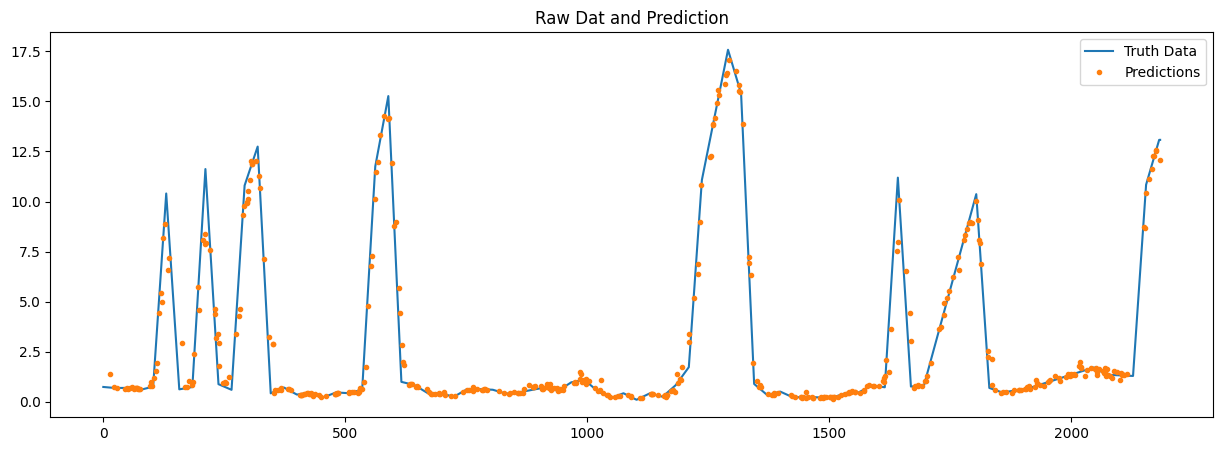

In [104]:
predictions = reg.predict(X_test)
y_test_df = pd.DataFrame(predictions, index=y_test.index, columns=['prediction'])
df = merged_dataset.merge(y_test_df, how='left', left_index=True, right_index=True)
ax = df[['Target_Water_Level']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()